In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the Titanic dataset
file_path = 'titanic_dataset.csv'  # Replace with the correct path to your dataset
titanic_df = pd.read_csv('D:\\OneDrive\\Desktop\\codsoft\\titanic_dataset.csv')

In [4]:
# Drop columns that won't be used in the prediction (PassengerId, Name, Ticket, Cabin)
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [5]:
# Handle missing values for 'Age' and 'Embarked'
imputer = SimpleImputer(strategy='most_frequent')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])
titanic_df['Embarked'] = imputer.fit_transform(titanic_df[['Embarked']])

In [6]:
# Encode categorical variables ('Sex' and 'Embarked')
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [7]:
# Separate the target variable (Survived) from the features
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [13]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [14]:
# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)

Accuracy: 81.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



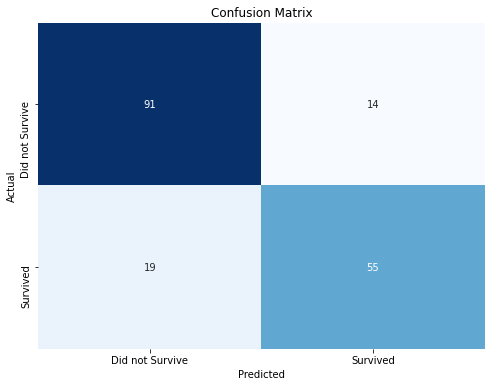

In [16]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Did not Survive', 'Survived'], 
            yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

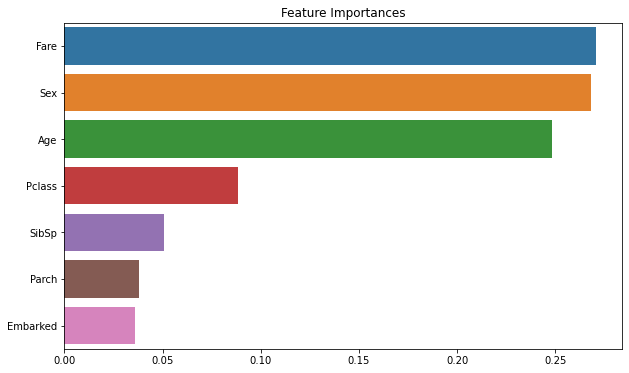

In [17]:
# Plot Feature Importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()